In [16]:

from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
def get_potential_features(csv_df):
    # Check which of the potential features are in the csv_df
    all_features = [
        "ELANE",
        "CD57",
        "CD45",
        "CD11B",
        "SMA",
        "CD16",
        "ECAD",
        "FOXP3",
        "NCAM",
        "anti_CD3",
        "anti_CD45RO",
        "Keratin_570",
        "aSMA_660",
        "CD4_488",
        "CD45_PE",
        "PD1_647",
        "CD20_488",
        "CD68_555",
        "CD8a_660",
        "CD163_488",
        "FOXP3_570",
        "PDL1_647",
        "Ecad_488",
        "Vimentin_555",
        "CDX2_647",
        "LaminABC_488",
        "Desmin_555",
        "CD31_647",
        "PCNA_488",
        "CollagenIV_647",
        "CD3",
        "CD45RO",
        "Pan-cytokeratin",
        "Aortic smooth muscle actin",
        "CD4",
        "CD45",
        "PD-1",
        "CD20",
        "CD68",
        "CD8a",
        "CD163",
        "FOXP3",
        "PD-L1",
        "E-cadherin",
        "Vimentin",
        "CDX-2",
        "Lamin-A/B/C",
        "Desmin",
        "CD31",
        "PCNA",
        "Collagen",
    ]
    all_features = list(set(all_features))
    potential_features = [
        feature for feature in all_features if feature in csv_df.columns
    ]
    return sorted(potential_features)

In [17]:
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/updated_renamed.csv')


In [18]:
non_features = [
    "Area",
    "MajorAxisLength",
    "MinorAxisLength",
    "Eccentricity",
    "Solidity",
    "Extent",
    "Orientation",
    "DNA_1",
    "DNA_2",
    "DNA_3",
    "DNA_4",
    "DNA_5",
    "DNA_6",
    "DNA_7",
    "DNA_8",
    "DNA_9",
    "DNA_10",
    "DNA_11",
    "DNA_12",
    "DNA_13",
]
# Check which of the potential features are in the csv_df
potential_features = get_potential_features(csv_df)
sel_df = csv_df.drop(
    non_features,
    axis=1,
    errors="ignore",
)
# for col in cluster_cols:
x_df = sel_df[potential_features]
y_df = sel_df[["UMAP_X", "UMAP_Y"]]
sample_x_df = x_df
sample_y_df = y_df

x_train, x_test, y_train, y_test = train_test_split(
    sample_x_df, sample_y_df, test_size=0.8, random_state=42
)

In [19]:
np.save('x.npy',sample_x_df.to_numpy())

In [20]:
regressor = xgb.XGBRegressor(learning_rate=0.015, n_estimators=700, max_depth=5)
regressor.fit(x_train, y_train)
xgb_preds = regressor.predict(x_test)



In [23]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=100, weights='distance')
neigh.fit(x_train, y_train)
knn_preds = neigh.predict(x_test)

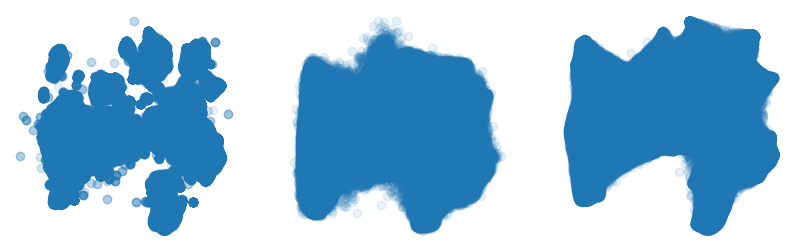

MSE for xgb:  1922408.9500016558
MSE for knn:  1285726.299376965


In [24]:
# plot xgb_preds, y_test on side by side scatter plots (2 plots)
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
y_test_np = y_test[['UMAP_X','UMAP_Y']].to_numpy()
axs[0].scatter(y_test_np[:, 0], y_test_np[:, 1], alpha=0.1)
axs[1].scatter(xgb_preds[:, 0], xgb_preds[:, 1], alpha=0.1)
axs[2].scatter(knn_preds[:, 0], knn_preds[:, 1], alpha=0.1)
# remove axis labels
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()
# axs[2].scatter(mlp_preds[:, 0], mlp_preds[:, 1], alpha=0.1)
plt.show()


# print MSE for each model
print("MSE for xgb: ", np.mean((y_test - xgb_preds) ** 2))
print("MSE for knn: ", np.mean((y_test - knn_preds) ** 2))


In [31]:
explainer = shap.KernelExplainer(neigh.predict, x_train)

Using 186650 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer(sample_x_df)


  0%|          | 0/933253 [00:00<?, ?it/s]